<ipython-input-1-44057da7787b>:39: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, Z, levels=[0.5], colors='red', linewidths=2)


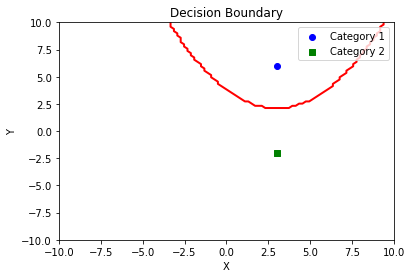

In [1]:
###Question 1

import numpy as np
import matplotlib.pyplot as plt

# Define the means and covariances for the categories
mu1 = np.array([3, 6])
sigma1 = np.array([[0.5, 0], [0, 2]])
mu2 = np.array([3, -2])
sigma2 = np.array([[2, 0], [0, 2]])

# Calculate the inverse of the covariances
sigma1_inv = np.linalg.inv(sigma1)
sigma2_inv = np.linalg.inv(sigma2)

# Define the decision boundary function
def decision_boundary(x, mu1, sigma1_inv, mu2, sigma2_inv):
    # Calculate the discriminant function
    g1 = -0.5 * (x - mu1).T @ sigma1_inv @ (x - mu1)
    g2 = -0.5 * (x - mu2).T @ sigma2_inv @ (x - mu2)
    
    # Compare the discriminant functions to determine the decision boundary
    if g1 > g2:
        return 1
    else:
        return 2

# Generate data points for plotting
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

# Calculate the decision boundary for each point
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = decision_boundary(x, mu1, sigma1_inv, mu2, sigma2_inv)

# Plot the decision boundary
plt.contour(X, Y, Z, levels=[0.5], colors='red', linewidths=2)
plt.scatter(mu1[0], mu1[1], c='blue', marker='o', label='Category 1')
plt.scatter(mu2[0], mu2[1], c='green', marker='s', label='Category 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Decision Boundary')
plt.show()


In [ ]:
###Question 2

# The covariance matrices ∑3 and ∑4 have different effects on the data compared to ∑1, which was a scaling matrix. Let's discuss
# the effects of ∑3 and ∑4 separately:

# ∑3 = [cos(𝛼), -sin(𝛼); sin(𝛼), cos(𝛼)]
# ∑3 is a rotation matrix that rotates the data by an angle of 𝛼 counter-clockwise. The effect of this rotation is that it
# changes the orientation of the data along the two axes. If 𝛼 = 0, ∑3 becomes an identity matrix, and there is no rotation. 
# As 𝛼 increases, the rotation angle increases, resulting in a greater rotation of the data.

# ∑4 = [-1, 0; 0, -1]
# ∑4 is a reflection matrix that reflects the data along both axes. The effect of this reflection is that it flips the data 
# along both the horizontal and vertical axes. The reflection matrix ∑4 essentially changes the signs of both components of the
# data vectors, resulting in a reflection of the data points across the origin.

# In summary, ∑3 is a rotation matrix that rotates the data, while ∑4 is a reflection matrix that reflects the data.
# Both ∑3 and ∑4 introduce different transformations to the data compared to the scaling matrix ∑1, which scales the data along 
# the axes. The choice of covariance matrix affects the shape, orientation, and scale of the data distribution, and is an 
# important factor in statistical analysis and machine learning tasks.

In [1]:
###Question 3

import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Separate features and target variable
X = df.iloc[:, :-1] # Features
y = df.iloc[:, -1]  # Target variable

# Build a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Classify new cases
new_cases = pd.DataFrame({'sepal_length': [6.5, 5.0, 5.9],
                          'sepal_width': [2.9, 3.4, 2.7],
                          'petal_length': [5.5, 1.5, 4.3],
                          'petal_width': [2.0, 0.2, 1.3]})
predictions = model.predict(new_cases)

# Print the predicted classes
for i in range(len(new_cases)):
    print("Case {}: Predicted class = {}".format(i+1, predictions[i]))


Case 1: Predicted class = Iris-virginica
Case 2: Predicted class = Iris-setosa
Case 3: Predicted class = Iris-versicolor


In [21]:
###Question 4

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the data from Excel file
data_file = "data3.xlsx"
df = pd.read_excel(data_file,header=None)

# Extract features and labels
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Labels

# Convert continuous target variable to discrete (categorical) values
y = pd.cut(y, bins=2, labels=['C1', 'C2'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a support vector machine (SVM) with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Calculate the coefficients of the separating hyperplane
w = svm.coef_[0]

# Calculate the length of the separating margin
norm_w = np.linalg.norm(w)  # Norm of w
margin = 2 / norm_w        # Margin is inversely proportional to the norm of w

# Print the direction w and the length of the separating margin
print("Direction w: ", w)
print("Length of the separating margin: ", margin)


Direction w:  [1.09731968]
Length of the separating margin:  1.822622914194885


In [25]:
###Question 5

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Extract first 40 samples of Iris-setosa and Iris-versicolor classes
setosa_df = df[df["class"] == "Iris-setosa"].head(40)
versicolor_df = df[df["class"] == "Iris-versicolor"].head(40)

# Concatenate the setosa and versicolor dataframes
df_subset = pd.concat([setosa_df, versicolor_df], ignore_index=True)

# Extract features and labels
X = df_subset.iloc[:, :-1]  # Features
y = df_subset.iloc[:, -1]   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit a support vector machine (SVM) model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict the classes of the remaining 10 samples
setosa_remaining = df[df["class"] == "Iris-setosa"].tail(10)
versicolor_remaining = df[df["class"] == "Iris-versicolor"].tail(10)
df_remaining = pd.concat([setosa_remaining, versicolor_remaining], ignore_index=True)
X_remaining = df_remaining.iloc[:, :-1]  # Features
y_remaining_true = df_remaining.iloc[:, -1]   # True labels
y_remaining_pred = svm.predict(X_remaining)   # Predicted labels

# Print the true and predicted classes of the remaining samples
print("True classes:")
print(y_remaining_true)
print("Predicted classes:")
print(y_remaining_pred)


True classes:
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10    Iris-versicolor
11    Iris-versicolor
12    Iris-versicolor
13    Iris-versicolor
14    Iris-versicolor
15    Iris-versicolor
16    Iris-versicolor
17    Iris-versicolor
18    Iris-versicolor
19    Iris-versicolor
Name: class, dtype: object
Predicted classes:
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor']


In [26]:
###Question 6

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Extract first 40 samples of Iris-setosa, Iris-versicolor, and Iris-virginica classes
setosa_df = df[df["class"] == "Iris-setosa"].head(40)
versicolor_df = df[df["class"] == "Iris-versicolor"].head(40)
virginica_df = df[df["class"] == "Iris-virginica"].head(40)

# Concatenate the setosa, versicolor, and virginica dataframes
df_subset = pd.concat([setosa_df, versicolor_df, virginica_df], ignore_index=True)

# Extract features and labels
X = df_subset.iloc[:, :-1]  # Features
y = df_subset.iloc[:, -1]   # Labels

# Encode the labels using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit a support vector machine (SVM) model using OneVsRestClassifier
svm = OneVsRestClassifier(SVC(kernel='linear'))
svm.fit(X_train, y_train)

# Predict the classes of the remaining 10 samples
setosa_remaining = df[df["class"] == "Iris-setosa"].tail(10)
versicolor_remaining = df[df["class"] == "Iris-versicolor"].tail(10)
virginica_remaining = df[df["class"] == "Iris-virginica"].tail(10)
df_remaining = pd.concat([setosa_remaining, versicolor_remaining, virginica_remaining], ignore_index=True)
X_remaining = df_remaining.iloc[:, :-1]  # Features
y_remaining_true = df_remaining.iloc[:, -1]   # True labels
y_remaining_pred = svm.predict(X_remaining)   # Predicted labels

# Decode the predicted labels back to original class names
y_remaining_pred = le.inverse_transform(y_remaining_pred)

# Print the true and predicted classes of the remaining samples
print("True classes:")
print(y_remaining_true)
print("Predicted classes:")
print(y_remaining_pred)


True classes:
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10    Iris-versicolor
11    Iris-versicolor
12    Iris-versicolor
13    Iris-versicolor
14    Iris-versicolor
15    Iris-versicolor
16    Iris-versicolor
17    Iris-versicolor
18    Iris-versicolor
19    Iris-versicolor
20     Iris-virginica
21     Iris-virginica
22     Iris-virginica
23     Iris-virginica
24     Iris-virginica
25     Iris-virginica
26     Iris-virginica
27     Iris-virginica
28     Iris-virginica
29     Iris-virginica
Name: class, dtype: object
Predicted classes:
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-vers

In [27]:
df_subset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
